In [1]:
using DataFrames, LinearAlgebra, CSV, Plots, Statistics

In [23]:
function time_dot(loops_num, lower_size, upper_size, step)
    different_sizes_num = (upper_size - lower_size + step) ÷ step

    measurements = Array{Float64}(undef, loops_num, different_sizes_num + 1)
    time_col = 1:loops_num
    measurements[:, 1] = time_col

    for i in lower_size:step:upper_size
        col = []
        for j in 1:loops_num
            append!(col, @elapsed LinearAlgebra.dot(rand(Int, i), rand(Int, i)))
        end
        measurements[:, (i - lower_size + step) ÷ step + 1] = col
    end

    names = [:Measurement_num]
    names = vcat(names, [Symbol("Vector_size:_$i") for i in lower_size:step:upper_size])
    measurements = convert(DataFrame, measurements)
    rename!(measurements, names)
    
    measurements[!, 1] = convert(Array{Int64}, measurements[!, 1])

    return measurements
end


function time_mlp(loops_num, lower_size, upper_size, step)
    different_sizes_num = (upper_size - lower_size + step) ÷ step

    measurements = Array{Float64}(undef, loops_num, different_sizes_num + 1)
    time_col = 1:loops_num
    measurements[:, 1] = time_col

    for i in lower_size:step:upper_size
        col = []
        for j in 1:loops_num
            append!(col, @elapsed rand(Int, (i, i)) * rand(Int, (i, i)))
        end
        measurements[:, (i - lower_size + step) ÷ step + 1] = col
    end

    names = [:Measurement_num]
    names = vcat(names, [Symbol("Square_matrix_size:_$i^1/2") for i in lower_size:step:upper_size])
    measurements = convert(DataFrame, measurements)
    rename!(measurements, names)

    measurements[!, 1] = convert(Array{Int64}, measurements[!, 1])

    return measurements
end

time_mlp (generic function with 1 method)

In [24]:
function write_result(dot_time, mlp_time)
    CSV.write("lab2.csv", join(dot_time, mlp_time, on = :Measurement_num))
end

write_result (generic function with 1 method)

In [25]:
LOOPS_NUM = 10

DOT_LOWER = 10000
DOT_UPPER = 1000000
DOT_STEP = 20000
DOT_NUM = (DOT_UPPER - DOT_LOWER + DOT_STEP) ÷ DOT_STEP

MLP_LOWER = 200
MLP_UPPER = 800
MLP_STEP = 50
MLP_NUM = (MLP_UPPER - MLP_LOWER + MLP_STEP) ÷ MLP_STEP

dot = time_dot(LOOPS_NUM, DOT_LOWER, DOT_UPPER, DOT_STEP)
mlp = time_mlp(LOOPS_NUM, MLP_LOWER, MLP_UPPER, MLP_STEP)
write_result(dot, mlp)

"lab2.csv"

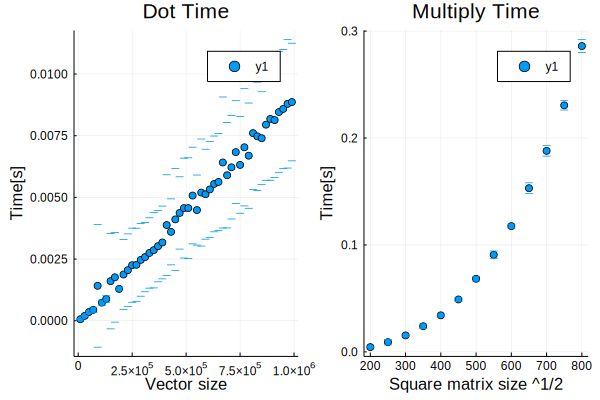

In [26]:
data = CSV.read("lab2.csv")
stds = []
means = []

for col in names(data[!, 2:end])
    append!(means, mean(data[!, col]))
    append!(stds, std(data[!, col], mean=means[end]))
end

p1 = scatter(DOT_LOWER:DOT_STEP:DOT_UPPER, means[1:DOT_NUM], yerr=stds[1:DOT_NUM], 
    title="Dot Time", xlabel="Vector size", ylabel="Time[s]")
p2 = scatter(MLP_LOWER:MLP_STEP:MLP_UPPER, means[(DOT_NUM + 1):end], yerr=stds[(DOT_NUM + 1):end], 
    title="Multiply Time", xlabel="Square matrix size ^1/2", ylabel="Time[s]")
scatter(p1, p2, layout=2)

In [73]:
loops_num = 10
types = [String]
types = vcat(types, [Float64 for i in 1:loops_num])
col_names = [Symbol("Type and size")]
col_names = vcat(col_names, [Symbol("$i sample") for i in 1:loops_num])
measurements = DataFrame(types, col_names, 0)

lower_size = 1
upper_size = 11

for i in lower_size:upper_size
    row = []
    push!(row, ("Vector size $i"))
    for j in 1:loops_num
        a = rand(Int, i)
        b = rand(Int, i)
        push!(row, @elapsed LinearAlgebra.dot(a, b))
    end
    push!(measurements, row)
end
measurements

MethodError: MethodError: Cannot `convert` an object of type Float64 to an object of type String
Closest candidates are:
  convert(::Type{String}, !Matched::Union{CategoricalString{R}, CategoricalValue{T,R} where T} where R) at C:\Users\Kacper\.julia\packages\CategoricalArrays\dmrjI\src\value.jl:94
  convert(::Type{String}, !Matched::WeakRefStrings.WeakRefString) at C:\Users\Kacper\.julia\packages\WeakRefStrings\lqf5B\src\WeakRefStrings.jl:79
  convert(::Type{String}, !Matched::FilePathsBase.AbstractPath) at C:\Users\Kacper\.julia\packages\FilePathsBase\Oyg1p\src\path.jl:83
  ...

In [42]:
DataFrame([String for k in 1:3], [Symbol("cod_$k") for k in 1:3])

,cod_1,cod_2,cod_3
,String,String,String
1,#undef,#undef,#undef
